In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('results/N100-F1000-S100-R10-result-v7.csv')
df.describe()

,correlation,load,value,disturbance,actual_load
count,3150.000000,3150.000000,2767.000000,3150.000000,3.150000e+03
mean,0.500000,0.800000,17.099963,0.140788,1.205806e+06
std,0.302813,0.070722,18.518098,0.038106,5.605922e+04
min,0.000000,0.700000,3.430427,0.009702,1.017925e+06
25%,0.250000,0.750000,8.776169,0.122476,1.173263e+06
50%,0.500000,0.800000,11.171028,0.148960,1.202671e+06
75%,0.750000,0.850000,14.122492,0.170866,1.235944e+06
max,1.000000,0.900000,91.498808,0.198665,1.435362e+06


In [3]:
vals = df.drop(['disturbance', 'actual_load'], axis=1).groupby(['algorithm', 'correlation', 'load']).mean()
vals = vals.unstack(0)
vals.reset_index(inplace=True)
vals.head()

correlation  load      value                      
algorithm                           BF         RR       SALP
0                 0.0  0.70   4.255926   4.455572   3.632557
1                 0.0  0.75   5.948872   6.220937   5.349580
2                 0.0  0.80   8.385400  10.633408   7.942784
3                 0.0  0.85  11.140403  39.253875  10.960882
4                 0.0  0.90  14.606261        NaN  52.317960

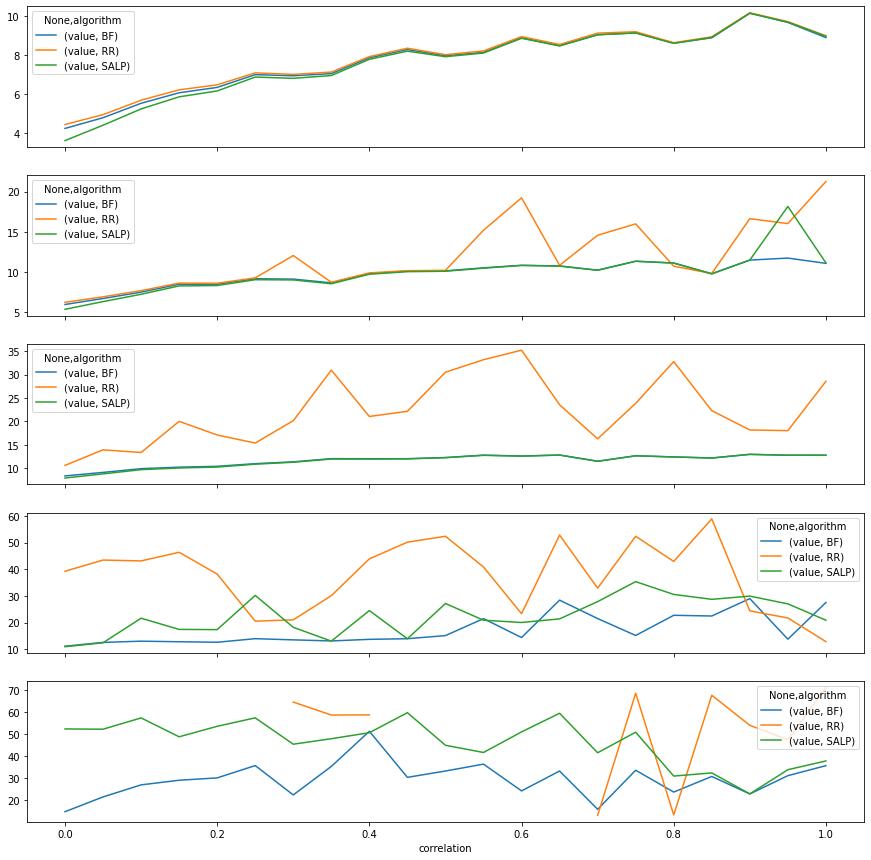

In [4]:
loads = vals['load'].unique()
fig, axes = plt.subplots(loads.size, 1, figsize=(15,15), sharex=True)
for i in range(loads.size):
    vals[vals['load']==loads[i]].drop('load', axis=1).plot(x='correlation', ax=axes[i], legend=True)
plt.show()

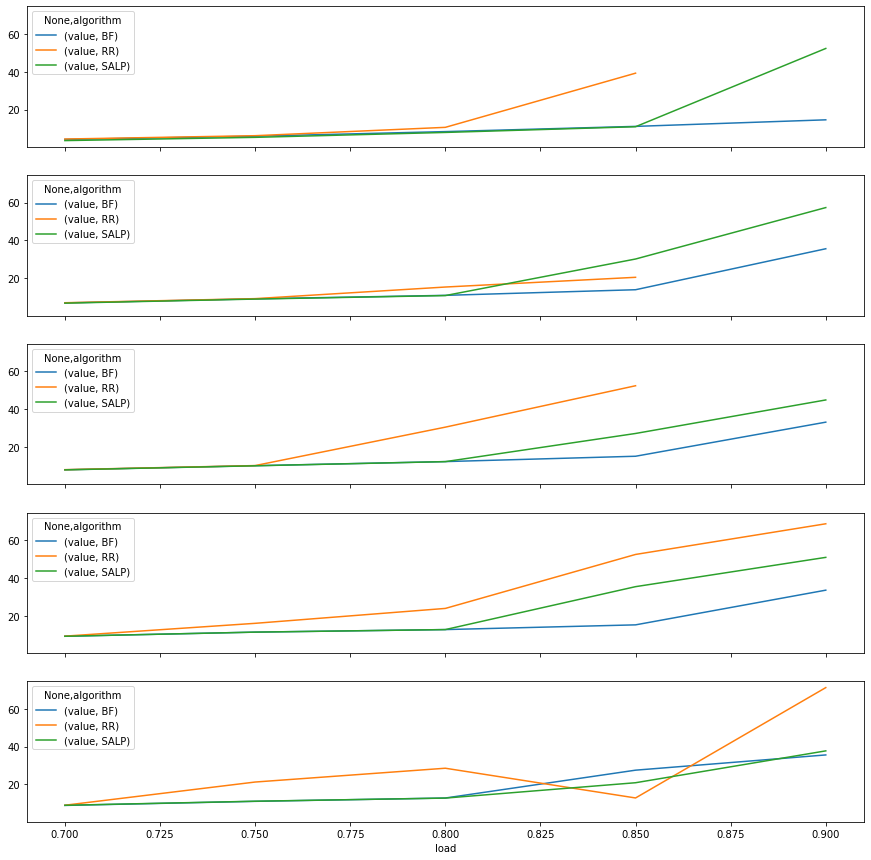

In [5]:
cors = np.array([0,.25,.5,.75,1])
fig, axes = plt.subplots(loads.size, 1, figsize=(15,15), sharex=True, sharey=True)
for i in range(cors.size):
    vals[vals['correlation']==cors[i]].drop('correlation', axis=1).plot(x='load', ax=axes[i], legend=True)
plt.show()

In [6]:
df.groupby(['algorithm', 'load']).count()

correlation  value  disturbance  actual_load
algorithm load                                              
BF        0.70          210    210          210          210
          0.75          210    210          210          210
          0.80          210    210          210          210
          0.85          210    207          210          210
          0.90          210    190          210          210
RR        0.70          210    210          210          210
          0.75          210    208          210          210
          0.80          210    195          210          210
          0.85          210    116          210          210
          0.90          210     25          210          210
SALP      0.70          210    210          210          210
          0.75          210    210          210          210
          0.80          210    210          210          210
          0.85          210    198          210          210
          0.90          210    158          210          210

In [7]:
dist = df.drop(['value', 'actual_load'], axis=1).groupby(['algorithm', 'correlation', 'load']).mean()
dist = dist.unstack(0)
dist.reset_index(inplace=True)
dist.head()

correlation  load disturbance                    
algorithm                            BF        RR      SALP
0                 0.0  0.70    0.177933  0.185701  0.155961
1                 0.0  0.75    0.178083  0.186122  0.157246
2                 0.0  0.80    0.178591  0.186162  0.157082
3                 0.0  0.85    0.178484  0.186037  0.156200
4                 0.0  0.90    0.178587  0.186566  0.156173

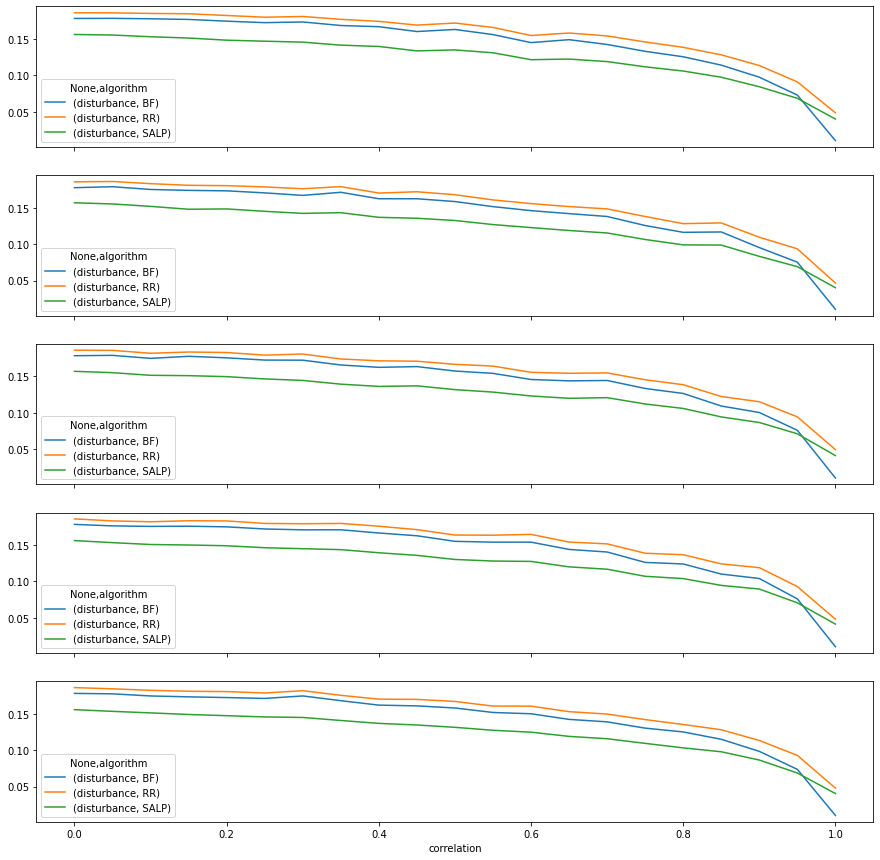

In [8]:
loads = vals['load'].unique()
fig, axes = plt.subplots(loads.size, 1, figsize=(15,15), sharex=True)
for i in range(loads.size):
    dist[dist['load']==loads[i]].drop('load', axis=1).plot(x='correlation', ax=axes[i], legend=True)
plt.show()

In [9]:
acld = df.drop(['algorithm', 'value', 'disturbance'], axis=1).groupby(['correlation', 'load']).mean()
# acld = acld.unstack(0)
acld.reset_index(inplace=True)
acld.head()

,correlation,load,actual_load
0,0.0,0.70,1.200573e+06
1,0.0,0.75,1.198189e+06
2,0.0,0.80,1.202285e+06
3,0.0,0.85,1.198508e+06
4,0.0,0.90,1.197140e+06


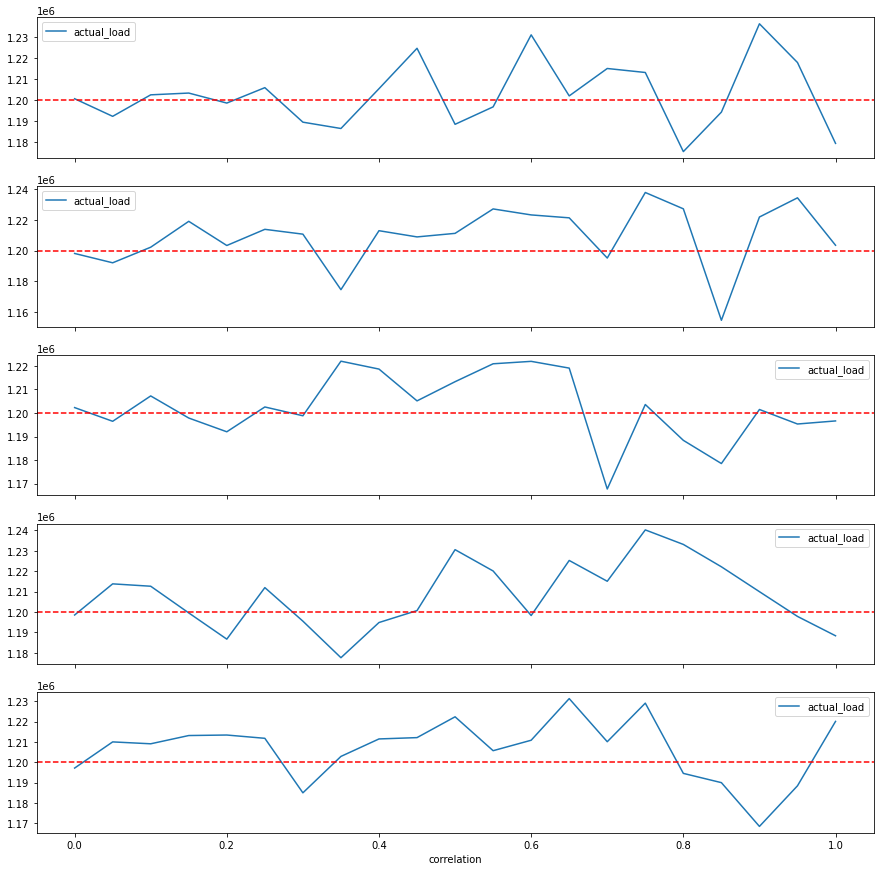

In [10]:
est = 1.2 * 10**6
loads = acld['load'].unique()
fig, axes = plt.subplots(loads.size, 1, figsize=(15,15), sharex=True)
for i in range(loads.size):
    acld[acld['load']==loads[i]].drop('load', axis=1).plot(x='correlation', ax=axes[i], legend=True)
    axes[i].axhline(est,color='red',ls='--')
plt.show()

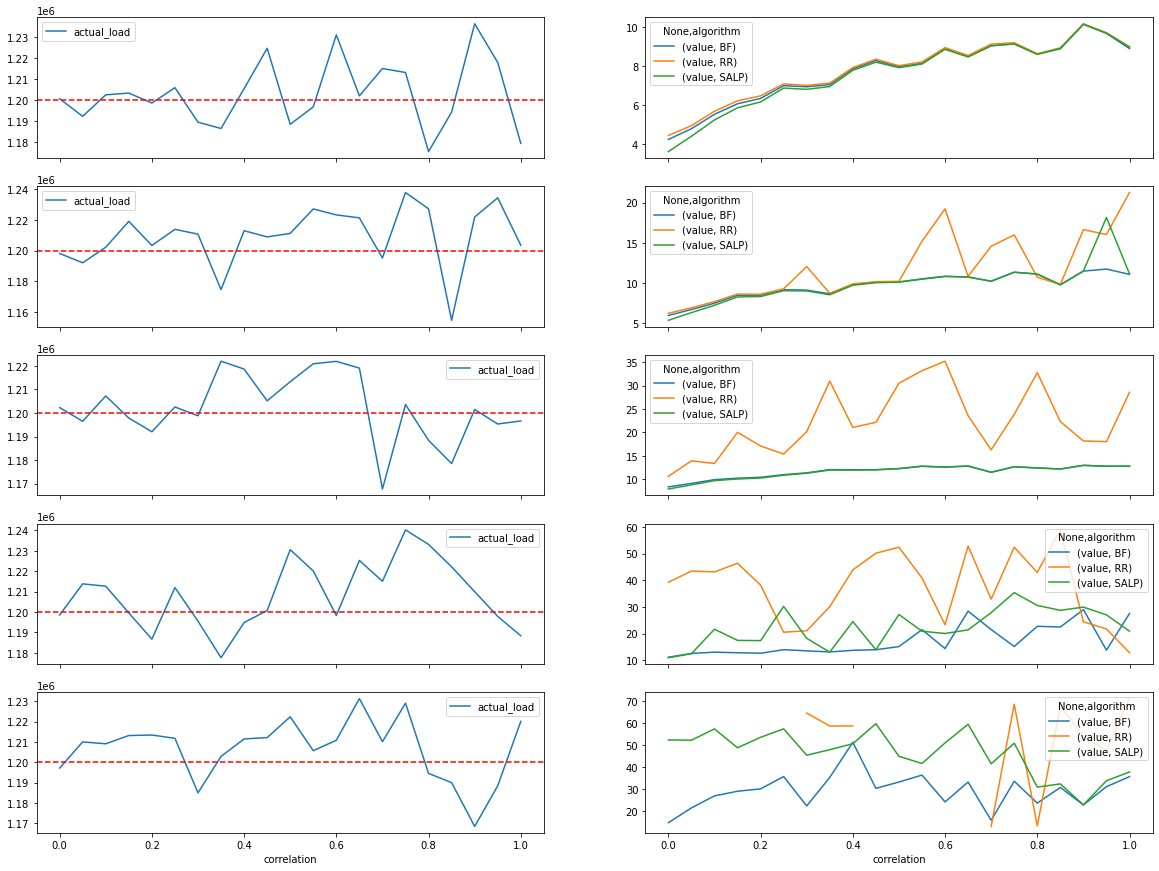

In [11]:
loads = acld['load'].unique()
fig, axes = plt.subplots(loads.size, 2, figsize=(20,15), sharex=True)
for i in range(loads.size):
    acld[acld['load']==loads[i]].drop('load', axis=1).plot(x='correlation', ax=axes[i][0], legend=True)
    axes[i][0].axhline(est,color='red',ls='--', label="estimated")
    vals[vals['load']==loads[i]].drop('load', axis=1).plot(x='correlation', ax=axes[i][1], legend=True)

plt.show()